In [1]:
import scipy.io
import numpy as np
import gtsam
from gtsam.utils.plot import plot_trajectory
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Load the data from `hw4_data.mat` 

In [6]:
# Load data
mat_file = 'hw4_data.mat'  # adjust path if needed
mat_contents = scipy.io.loadmat(mat_file)

# Noisy odometry measurements (1 x N cell, each cell is 4x4 double) 
dposes = mat_contents['dpose'][0]
# Initial trajectory estimate (1 x N cell, each cell is 4x4 double)
traj3 = mat_contents['traj3'][0]
# Ground truth trajectory (1 x N cell, each cell is 4x4 double)
poses3_gt = mat_contents['poses3_gt'][0]

print(traj3[0].dtype)  # Should show float64
print(f"Number of poses in initial trajectory: {len(traj3)}")
print(f"Number of ground-truth poses: {len(poses3_gt)}")


float64
Number of poses in initial trajectory: 50
Number of ground-truth poses: 50


## Step 2: Convert transformations to `gtsam.Pose3` objects and store in `gtsam.Values`

In [3]:
def mat_to_pose3(matrix):
    """
    Convert a 4x4 transformation matrix to a gtsam.Pose3.
    """
    R = gtsam.Rot3(matrix[:3, :3])  # Rotation
    t = gtsam.Point3(matrix[:3, 3]) # Translation
    return gtsam.Pose3(R, t)

# Create gtsam.Values for the initial estimate
initial_trajectory = gtsam.Values()
for i, T in enumerate(traj3):
    pose = mat_to_pose3(T)
    initial_trajectory.insert(gtsam.symbol('x', i), pose)

# Create gtsam.Values for the ground truth
ground_truth_trajectory = gtsam.Values()
for i, T in enumerate(poses3_gt):
    pose = mat_to_pose3(T)
    ground_truth_trajectory.insert(gtsam.symbol('x', i), pose)


## Step 3: Plot the initial trajectory


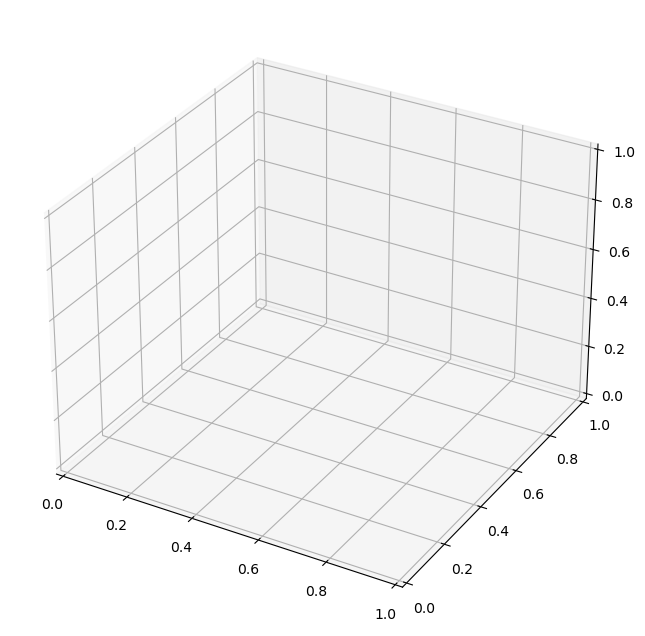

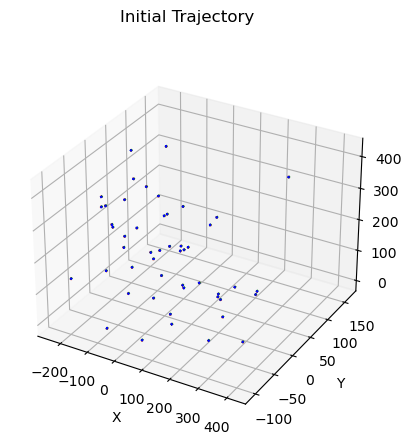

In [4]:
# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the initial trajectory
plot_trajectory(
    fignum=0,
    values=initial_trajectory,
    scale=1,
    title="Initial Trajectory",
    axis_labels=("X", "Y", "Z"),
)

## Step 4: Overlay the ground truth trajectory

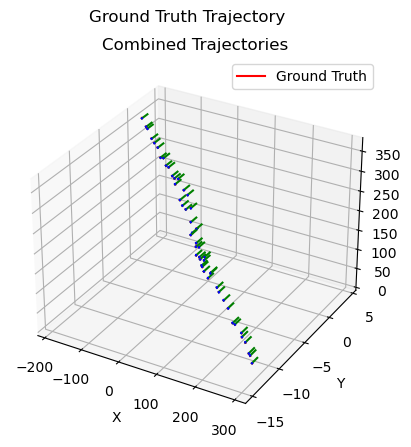

In [5]:
plot_trajectory(
    fignum=0,
    values=ground_truth_trajectory,
    scale=1,
    title="Ground Truth Trajectory",
    axis_labels=("X", "Y", "Z"),
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Combined Trajectories")
plt.legend(["Ground Truth"])
plt.show()
# Top-down view (looking down the Z-axis)
ax.view_init(elev=90, azim=-90)
